In [20]:
import sys
import glob
import subprocess

sys.path.append("/Users/pp/Documents/Repos/qn-lib")
sys.path.append("/Users/pp/Documents/Repos/qn-lib/src/cal_parsing/build")
print(sys.path)

so_paths = glob.glob('/Users/pp/Documents/Repos/qn-lib/src/cal_parsing/build/*.so')

if len(so_paths) > 0:
    print("yes")
else:
    command = "cmake ~/Documents/Repos/qn-lib/src/cal_parsing/CMakeLists.txt -B~/Documents/Repos/qn-lib/src/cal_parsing/build"
    process = subprocess.Popen(command.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    print(output)

    command = "make -C ~/Documents/Repos/qn-lib/src/cal_parsing/build"
    process = subprocess.Popen(command.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    print(output)


from src.postprocessing.QNC_std_output_factory import OutputFormat
from src.postprocessing.QNC_output_parser import QNC_output_parser
from src.postprocessing.QNC_ncdf_reader import QNC_ncdf_reader

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev', '/Users/pp/Documents/Repos/QPy/Tests/post_process/plant_hydraulics', '/Users/pp/Documents/Repos/QPy', '/Users/pp/opt/anaconda3/lib/python39.zip', '/Users/pp/opt/anaconda3/lib/python3.9', '/Users/pp/opt/anaconda3/lib/python3.9/lib-dynload', '', '/Users/pp/.local/lib/python3.9/site-packages', '/Users/pp/opt/anaconda3/lib/python3.9/site-packages', '/Users/pp/Documents/Repos/qn-lib', '/Users/pp/Documents/Repos/qn-lib/src/cal_parsing/build', '/Users/pp/Documents/Repos/qn-lib', '/Users/pp/Documents/Repos/qn-lib/src/cal_parsing/build', '/Users/pp/Documents/Repos/qn-lib', '/Users/pp/Documents/Repos/qn-lib/src/cal_parsing/build']
yes


In [4]:
exp_path = '/Users/pp/data/Simulations/A09_QUINCY_Hydraulics/tests/online/'
parser = QNC_output_parser(exp_path)


In [5]:
parser.read()

In [16]:
output = parser.Available_outputs['static']

In [19]:
output.Time_resolution

['PHYD_static_timestep.nc',
 'Q_ASSIMI_static_timestep.nc',
 'SB_static_timestep.nc',
 'Q_PHENO_static_timestep.nc',
 'SPQ_static_timestep.nc',
 'Q_RAD_static_timestep.nc',
 'VEG_static_timestep.nc',
 'A2L_static_timestep.nc']

In [21]:
nc_output = QNC_ncdf_reader(exp_path,
                                        output.Categories,
                                        output.Identifier,
                                        output.Time_resolution
                                        )

nc_output.parse_env_and_variables()
nc_output.read_all_1D()
nc_output.close()

     Reading time variable...      Done! (0.0 sec.)
     Parsing time variable... Done! (5.7 sec.)
     Reading variable names and units... Done! (5.7 sec.)
     Reading all 1D variables... Done! (0.2 sec.)


In [22]:
nc_output.Dataset_Names_1D

{'PHYD': ['psi_leaf_avg', 'psi_stem_avg', 'stem_flow_avg', 'G_avg'],
 'Q_ASSIMI': ['gpp_avg', 'gc_avg', 'beta_gs', 'beta_ps'],
 'SB': ['sol_litter_C', 'het_respiration_avg'],
 'Q_PHENO': ['growing_season'],
 'SPQ': ['water_content_soil',
  'pet_avg',
  'evaporation_avg',
  'interception_avg',
  'transpiration_avg',
  'srf_runoff_avg',
  'drainage_avg',
  'qh_avg',
  'qle_avg',
  'qg_avg'],
 'Q_RAD': ['albedo_avg', 'appfd_avg'],
 'VEG': ['vegpool_leaf_C',
  'vegpool_fine_root_C',
  'vegpool_coarse_root_C',
  'vegpool_sap_wood_C',
  'vegpool_heart_wood_C',
  'vegpool_labile_C',
  'vegpool_reserve_C',
  'vegpool_fruit_C',
  'total_veg_c',
  'LAI',
  'height',
  'diameter',
  'beta_sinklim',
  'growth_resp_avg',
  'maint_resp_avg',
  'npp_avg'],
 'A2L': ['ga_avg']}

In [25]:
nc_output.Datasets_1D['PHYD']

,index,year,month,day,hour,min,sec,day_of_year,date,time,psi_leaf_avg,psi_stem_avg,stem_flow_avg,G_avg
0,0,1993,1,1,0,0,0,0.000000,1993-01-01 00:00:00,1800.0,-0.010014,-0.03436,0.000006,0.000006
1,1,1993,1,1,0,30,0,0.020833,1993-01-01 00:30:00,3600.0,-0.010014,-0.03436,0.000000,0.000000
2,2,1993,1,1,1,0,0,0.041667,1993-01-01 01:00:00,5400.0,-0.010014,-0.03436,0.000000,0.000000
3,3,1993,1,1,1,30,0,0.062500,1993-01-01 01:30:00,7200.0,-0.010014,-0.03436,0.000000,0.000000
4,4,1993,1,1,2,0,0,0.083333,1993-01-01 02:00:00,9000.0,-0.010014,-0.03436,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350395,350395,2012,12,31,21,30,0,364.895833,2012-12-31 21:30:00,630712800.0,-0.096602,-0.06481,0.000000,0.000000
350396,350396,2012,12,31,22,0,0,364.916667,2012-12-31 22:00:00,630714600.0,-0.096602,-0.06481,0.000000,0.000000
350397,350397,2012,12,31,22,30,0,364.937500,2012-12-31 22:30:00,630716400.0,-0.096602,-0.06481,0.000000,0.000000
350398,350398,2012,12,31,23,0,0,364.958333,2012-12-31 23:00:00,630718200.0,-0.096602,-0.06481,0.000000,0.000000


In [26]:
nc_output.times_np_64

array(['1993-01-01T00:00:00', '1993-01-01T00:30:00',
       '1993-01-01T01:00:00', ..., '2012-12-31T22:30:00',
       '2012-12-31T23:00:00', '2012-12-31T23:30:00'],
      dtype='datetime64[s]')

In [31]:
import matplotlib.pyplot as plt
import datetime

(12913.0, 12935.0)

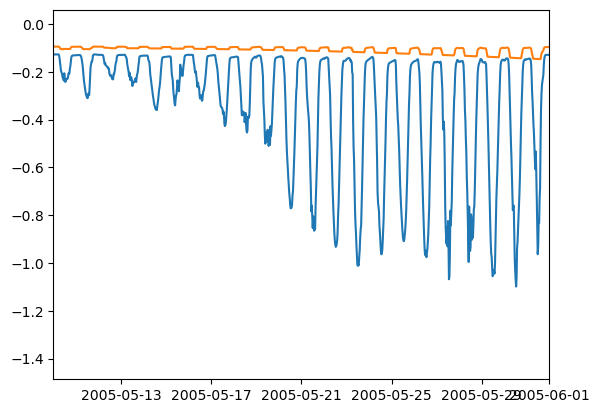

In [58]:
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['psi_leaf_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['psi_stem_avg'] )
plt.xlim((datetime.datetime(2005,5,10),datetime.datetime(2005,6,1)))

(12913.0, 12935.0)

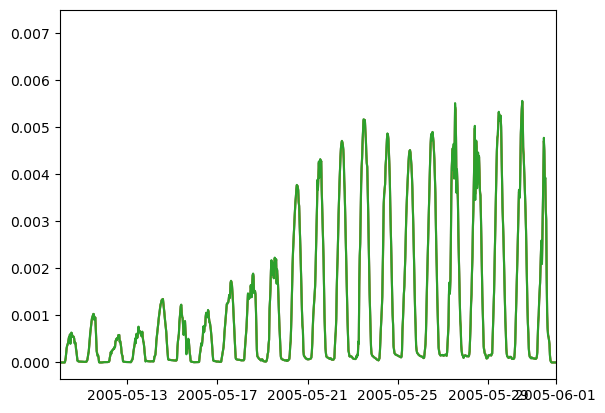

In [59]:
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['stem_flow_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['G_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['SPQ']['transpiration_avg'] * 1000/18.0 )
plt.xlim((datetime.datetime(2005,5,10),datetime.datetime(2005,6,1)))

(12913.0, 12935.0)

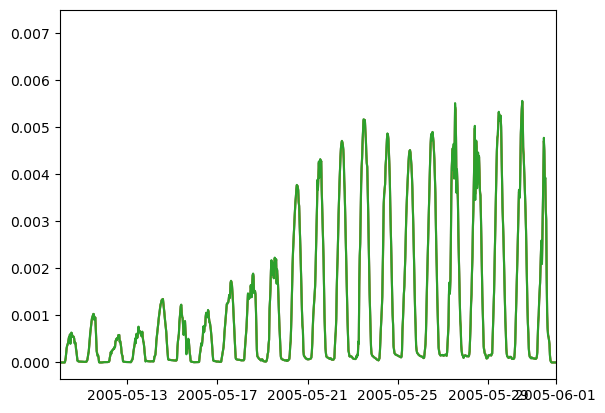

In [60]:
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['stem_flow_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['G_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['SPQ']['transpiration_avg'] * 1000/18.0 )
plt.xlim((datetime.datetime(2005,5,10),datetime.datetime(2005,6,1)))

(12913.0, 12935.0)

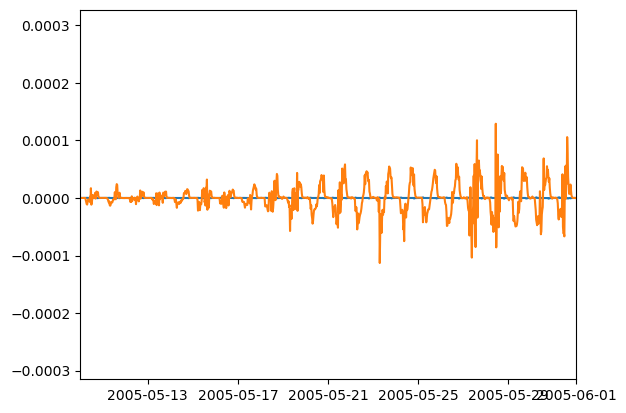

In [62]:
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['stem_flow_avg']- nc_output.Datasets_1D['PHYD']['G_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['stem_flow_avg']- nc_output.Datasets_1D['SPQ']['transpiration_avg'] * 1000/18.0 )
plt.xlim((datetime.datetime(2005,5,10),datetime.datetime(2005,6,1)))